In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..') # Avoid error with importing of src
from src.utils_py.auxil import rho_roll_theta
from src.utils_py.profile_approx import profile_approx, profile_approx_modified
from src.utils_py.io.gro import read_gro

---

In [2]:
# Initialize all necessary variables

structure_file = 'data/cal_dw_1340_14458.gro'
dens_profile_file = 'data/dens_cal.xvg'
rho_bulk = 3.0896 * 10  # bulk density of decane multiplied by the number of atoms in the decane molecule
l = 2.223               # l = L / H
phi = 0.5               # volume fraction of decane
H = 9.0                 # height of the pore
surface_type = 'roll'

In [3]:
# Finding approximation with classical algorithm from the article

z, dens, best = profile_approx(
    dens_profile_file,
    rho_bulk,
    l,
    phi,
    H,
    surface_type
)

print('theta:', '{:.1f}º'.format(np.rad2deg(best['theta'])))

Optimization terminated successfully.
         Current function value: 12.686228
         Iterations: 14
         Function evaluations: 28
theta: 114.3º


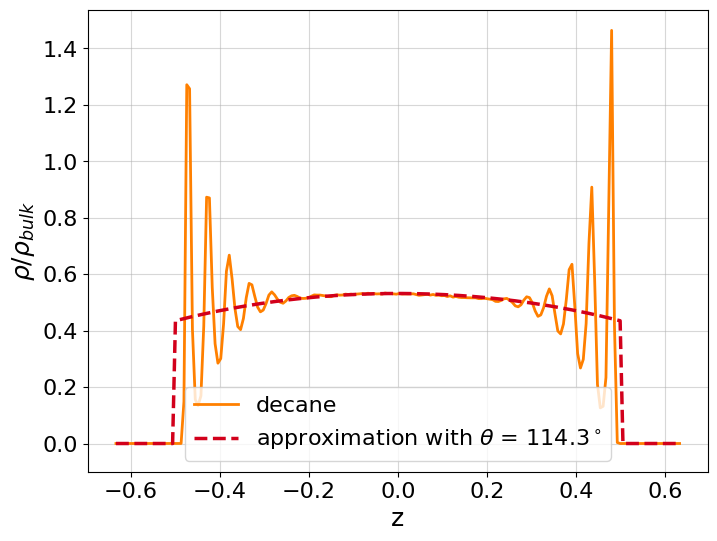

In [4]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.plot(
    z, dens,
    label='decane',
    color='#FF8000',
    linewidth=2
)

plt.plot(
    z, rho_roll_theta(z, l, phi, best['theta']),
    label=r'approximation with $\theta$ = {:.1f}$^\circ$'.format(np.rad2deg(best["theta"])),
    color='#D2001B',
    linewidth=2.5,
    linestyle='dashed'
)

plt.xlabel('z', fontsize=18)
plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='lower center', fontsize=16)
plt.ylim(bottom=-0.1)

plt.show()

In [5]:
# Finding approximation with modified algorithm

z_m, dens_m, l_m, real_phi, H_m, best_m = profile_approx_modified(
    structure_file,
    dens_profile_file,
    rho_bulk,
    ['DECAN'],
    surface_type
)

print('theta: ', '{:.1f}º'.format(np.rad2deg(best_m['theta'])))
print('offset:', '{:.3f}'.format(best_m['offset']))

real H: 8.726
real phi: 0.5155751225129682
Optimization terminated successfully.
         Current function value: 10.441468
         Iterations: 53
         Function evaluations: 97
theta:  119.1º
offset: -0.021


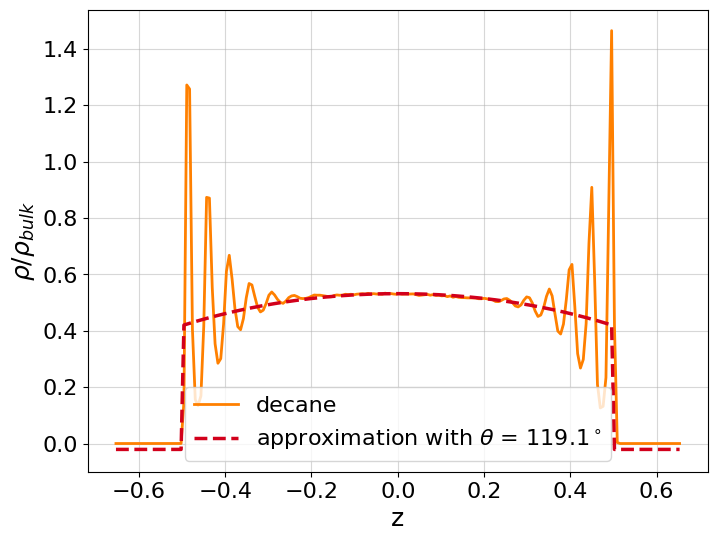

In [6]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.plot(
    z_m, dens_m,
    label='decane',
    color='#FF8000',
    linewidth=2
)

plt.plot(
    z_m, rho_roll_theta(z_m, l_m, real_phi, best_m['theta']) + best_m['offset'],
    label=r'approximation with $\theta$ = {:.1f}$^\circ$'.format(np.rad2deg(best_m["theta"])),
    color='#D2001B',
    linewidth=2.5,
    linestyle='dashed'
)

plt.xlabel('z', fontsize=18)
plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='lower center', fontsize=16)
plt.ylim(bottom=-0.1)

plt.show()